In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r"C:\Users\HP\Documents\Copy of churn1.xlsx", sheet_name="vw_churn")


In [4]:
#vw_joined


In [5]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12210-AND,Male,66,No,Andhra Pradesh,9,31,none,No,none,...,Credit Card,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed,none,none
1,12531-AND,Male,56,No,Andhra Pradesh,1,12,none,No,none,...,Bank Withdrawal,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed,none,none
2,13500-BIH,Male,51,No,Bihar,9,18,none,No,none,...,Credit Card,56.400002,2928.500000,0.0,0,0.0,2928.500000,Stayed,none,none
3,14399-MAD,Female,56,Yes,Madhya Pradesh,8,9,none,No,none,...,Credit Card,35.450001,1958.949951,0.0,0,0.0,1958.949951,Stayed,none,none
4,14622-PUN,Female,49,Yes,Punjab,9,15,none,No,none,...,Bank Withdrawal,34.250000,163.550003,0.0,0,0.0,163.550003,Stayed,none,none


In [6]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
df

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,77,1,66,0,0,9,31,5,0,2,...,1,34.299999,577.150024,0.000000,0,0.000000,577.150024,1,5,20
1,111,1,56,0,0,1,12,5,0,2,...,0,62.500000,4136.399902,0.000000,0,0.000000,4136.399902,1,5,20
2,184,1,51,0,2,9,18,5,0,2,...,1,56.400002,2928.500000,0.000000,0,0.000000,2928.500000,1,5,20
3,249,0,56,1,11,8,9,5,0,2,...,1,35.450001,1958.949951,0.000000,0,0.000000,1958.949951,1,5,20
4,268,0,49,1,15,9,15,5,0,2,...,0,34.250000,163.550003,0.000000,0,0.000000,163.550003,1,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,4152,0,70,1,7,13,15,4,1,1,...,0,81.000000,371.649994,40.639999,10,236.399994,577.409973,0,1,3
6003,4374,0,23,0,12,9,10,2,1,1,...,1,85.300003,2917.500000,23.889999,130,1579.900024,4603.509766,0,1,5
6004,4412,0,71,0,7,11,31,5,1,1,...,0,98.500000,3004.149902,37.549999,40,747.619995,3754.219971,0,0,0
6005,4670,0,36,0,2,7,20,4,1,0,...,1,53.849998,259.799988,22.959999,10,121.599998,368.440002,0,1,4


In [8]:
data  = df.drop(columns=['Customer_ID', 'Churn_Category', 'Churn_Reason']) 

In [9]:
x = data.drop(columns=['Customer_Status'],axis=1)
y = data['Customer_Status']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)
print("classificatio_report:", classification_report(y_test, y_pred))
print("confusion_matrix:",confusion_matrix(y_test, y_pred))

classificatio_report:               precision    recall  f1-score   support

           0       0.76      0.63      0.68       340
           1       0.86      0.92      0.89       862

    accuracy                           0.84      1202
   macro avg       0.81      0.77      0.79      1202
weighted avg       0.83      0.84      0.83      1202

confusion_matrix: [[213 127]
 [ 69 793]]


Text(0.5, 0, 'Features')

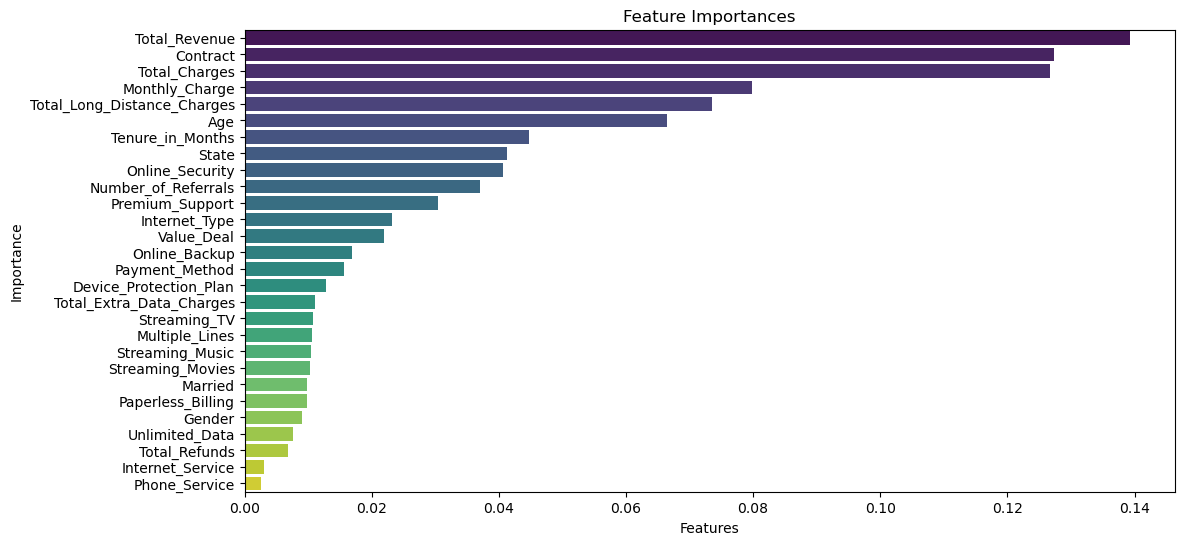

In [23]:
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importance[indices], y=X_train.columns[indices], palette='viridis')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Features")

In [24]:
dff = pd.read_excel(r"C:\Users\HP\Documents\Copy of churn1.xlsx", sheet_name="vw_joined")

In [25]:
dff.head()


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12257-ASS,Female,39,No,Assam,9,1,none,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,none,none
1,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,Credit Card,19.650000,19.650000,0.0,0,23.670000,43.320000,Joined,none,none
2,14567-TAM,Male,43,No,Tamil Nadu,1,9,none,Yes,No,...,Credit Card,20.350000,20.350000,0.0,0,44.090000,64.440002,Joined,none,none
3,15591-KAR,Female,26,No,Karnataka,3,31,none,Yes,No,...,Credit Card,20.400000,20.400000,0.0,0,45.910000,66.309998,Joined,none,none
4,15803-UTT,Female,34,No,Uttar Pradesh,6,31,none,Yes,No,...,Credit Card,19.150000,19.150000,0.0,0,22.370001,41.520000,Joined,none,none


In [33]:
dff_new = dff.copy()
dff_ecnoded = dff_new.drop(columns=['Customer_ID', 'Churn_Category', 'Churn_Reason', 'Customer_Status'])
categorical_cols = dff_ecnoded.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    dff_ecnoded[col] = le.fit_transform(dff_ecnoded[col])
    label_encoders[col] = le
        

In [34]:
new_predictions = rf_model.predict(dff_ecnoded)

In [35]:
dff_new['churn_prediction'] = new_predictions

In [36]:
dff_churned = dff_new[dff_new['churn_prediction'] == 1]

In [40]:
dff_churned.to_csv(r"C:\Users\HP\Documents\data.csv", index=False)